<a href="https://colab.research.google.com/github/retnowm/User-Retention---Onlineretaildata/blob/main/Online_Retail_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impor packages

In [ ]:
# pip install pandas
# pip install numpy
# pip install datetime
# pip install seaborn
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.getcwd()

'/content'

# Impor data dari CSV ke DataFrame

In [ ]:
#import data from laptop
# 1.1
from google.colab import files
import io
uploaded = files.upload()

Saving Online Retail Data.xlsx to Online Retail Data.xlsx


In [ ]:
# 1.2
df = pd.read_excel(io.BytesIO(uploaded['Online Retail Data.xlsx']))
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      461773 non-null  object        
 1   product_code  461773 non-null  object        
 2   product_name  459055 non-null  object        
 3   quantity      461773 non-null  int64         
 4   order_date    461773 non-null  datetime64[ns]
 5   price         461773 non-null  float64       
 6   customer_id   360853 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.7+ MB


# Data Cleaning

In [ ]:
df_clean = df.copy()
# deletes all rows without product_name
df_clean = df_clean[~df_clean['product_name'].isna()]
# make all product_name lowercase
df_clean['product_name'] = df_clean['product_name'].str.lower()
# delete all product_name lines with the word test
df_clean = df[~df['product_name'].str.contains('test', case=False, na=False)]
# create an order_status column with the value 'cancelled' if the order_id begins with the letter 'c' and 'delivered' if the order_id does not begin with the letter 'c'
df_clean['order_status'] = np.where(df_clean['order_id'].str[:1]== 'C','cancelled','delivered')
# change the negative quantity value to positive because the negative value only indicates that the order was cancelled
df_clean['quantity'] = df_clean['quantity'].abs()
# delete rows with negative prices
df_clean = df_clean[df_clean['price']>0]
# create an amount value, namely the product of quantity and price
df_clean['amount'] = df_clean['quantity'] * df_clean['price']
# Replace product_name from product_code which has several product_names with one of the product_names that appears most frequently
most_freq_product_name = df_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')
# convert customer_id to string
df_clean['customer_id'] = df_clean['customer_id'].astype(str)
# delet outlier
from scipy import stats
df_clean = df_clean[(np.abs(stats.zscore(df_clean[['quantity','amount']]))<3).all(axis=1)]
df_clean = df_clean.reset_index(drop=True)

<ipython-input-6-1b6da0e36402>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_status'] = np.where(df_clean['order_id'].str[:1]== 'C','cancelled','delivered')
<ipython-input-6-1b6da0e36402>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['quantity'] = df_clean['quantity'].abs()
<ipython-input-6-1b6da0e36402>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount
0,C493411,21539,RED RETROSPOT BUTTER DISH,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25
1,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85
2,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,nan,delivered,3.75
3,493413,21723,ALPHABET HEARTS STICKER SHEET,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85
4,493414,21844,RED RETROSPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80
...,...,...,...,...,...,...,...,...,...
455491,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,nan,delivered,1.25
455492,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,nan,delivered,5.80
455493,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,nan,delivered,3.75
455494,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,nan,delivered,1.25


In [ ]:
df_clean.info()

# EDA Descriptive Statistics & Grouping

In [ ]:
# 1. Know many rows/records and columns/variables/features
df_clean.shape

In [ ]:
# 2. Know the data type of each column
df_clean.info()

In [ ]:
categoricals = ['order_id', 'product_code', 'product_name', 'customer_id', 'order_status']
numericals = [ 'quantity',  'price', 'amount']

In [ ]:
df_clean[numericals].describe()

In [ ]:
df_clean[categoricals].describe()

In [ ]:
# target
df_clean['order_status'].unique()

In [ ]:
df_clean['order_status'].value_counts()

delivered    447458
cancelled      8038
Name: order_status, dtype: int64

# Data Visualization & Correlation

In [ ]:
df_clean

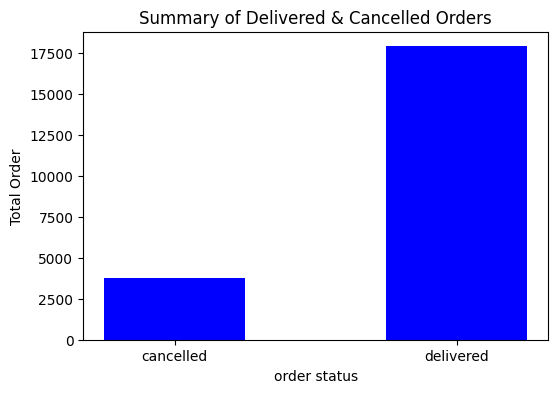

In [ ]:
# 1. Summary of Delivered & Cancelled Orders
df_order_satus = df_clean.groupby('order_status', as_index=False).agg(order_cnt=('order_id','nunique'),total_amount=('amount','sum'))
fig = plt.figure(figsize=(6,4))
plt.bar(df_order_satus['order_status'],
        df_order_satus['order_cnt'],
        color='blue',
        width=0.5)
# 2.3 buat nama
plt.xlabel('order status')
plt.ylabel('Total Order')
plt.title('Summary of Delivered & Cancelled Orders')
plt.show()

Melihat potensi dari status order yang deliver dan cancel
* delivered order lebih tinggi dari cancelled order dengan perbedaan yang sangat besar
* Total order deliveri yang tinggi mempengaruhi dengan total pendapatan dengan nilai 97,77% lebih tinggi dari canceled order dengan nilai 2,23%
* 17925 deliver order dan 3746 cancelled order keberhasilah order yang tinggi ini merupakan peluang untuk untuk terus meningkatkan order dengan mempertahan pelangga tersebut menjadi pelanggal royal

In [ ]:
df_clean['order_month'] = df_clean['order_date'].dt.to_period('M')
pivot_table = pd.pivot_table(df_clean,
               values=['amount','order_id'],
               index='order_month',
               columns='order_status',
               aggfunc={'amount' : np.sum, 'order_id' : pd.Series.nunique},
               fill_value=0)
pivot_table

amount               order_id          
order_status cancelled    delivered cancelled delivered
order_month                                            
2010-01        7619.02   410747.092       250       969
2010-02        5871.44   405100.326       197      1076
2010-03       12998.63   583598.631       349      1507
2010-04       10562.66   501942.411       262      1320
2010-05       23289.03   484624.790       363      1363
2010-06       14152.53   519334.830       315      1474
2010-07       11203.21   467673.260       294      1383
2010-08       10723.57   501172.310       239      1283
2010-09       12050.65   615929.161       303      1612
2010-10       16243.80   820134.310       391      2050
2010-11       20365.07  1027620.252       495      2472
2010-12       13104.42   594964.640       288      1416

In [ ]:
# 3. Comparison of Canceled and Delivered Based on total orders
total_order_month = pd.pivot_table(df_clean,
               values='order_id',
               index='order_month',
               columns='order_status',
               aggfunc=pd.Series.nunique,
               fill_value=0)

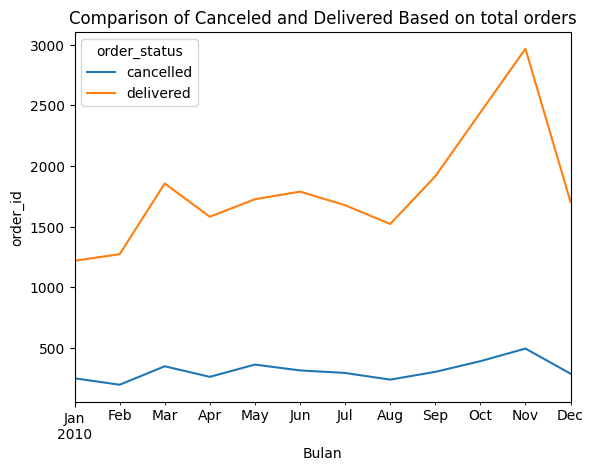

In [ ]:
total_order_month[['cancelled', 'delivered']].plot(kind='line', stacked=True)
plt.title('Comparison of Canceled and Delivered Based on total orders')
plt.xlabel('Bulan')
plt.ylabel('order_id')
plt.show()

In [ ]:
# 4. Comparison of Canceled and Delivered Based on total amount
# 4.1 Creat the aggregate
df_order_satus

,order_status,order_cnt,total_amount
0,cancelled,3746,158184.030
1,delivered,17925,6932842.013


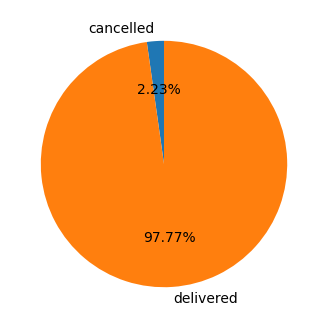

In [ ]:
# 4.2 Creat chart
fig = plt.figure(figsize=(6,4))
plt.pie(df_order_satus['total_amount'], labels=df_order_satus['order_status'], autopct='%1.2f%%', startangle=90)
plt.show()

<ipython-input-26-508d3246b6f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), cmap='Blues', annot=True)


<Axes: >

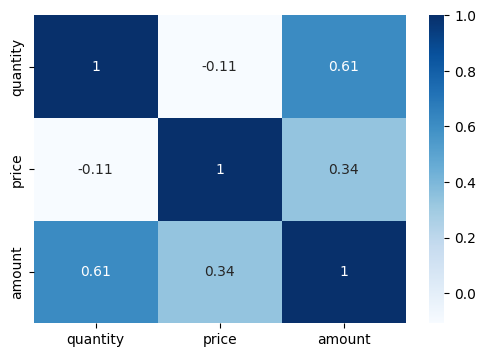

In [ ]:
# 5. Heatmap - Correlation
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df_clean.corr(), cmap='Blues', annot=True)

# User Retention Analysis
user retention analysis to find out the behavior of users who return to make transactions or use a product

RETENTION RATE formula = number of users who return to make transactions/number of users who previously made transactions X 100%

Cohort analysis allows us to see user retention from various times at once so that we can analyze how consistently our users return to transact.

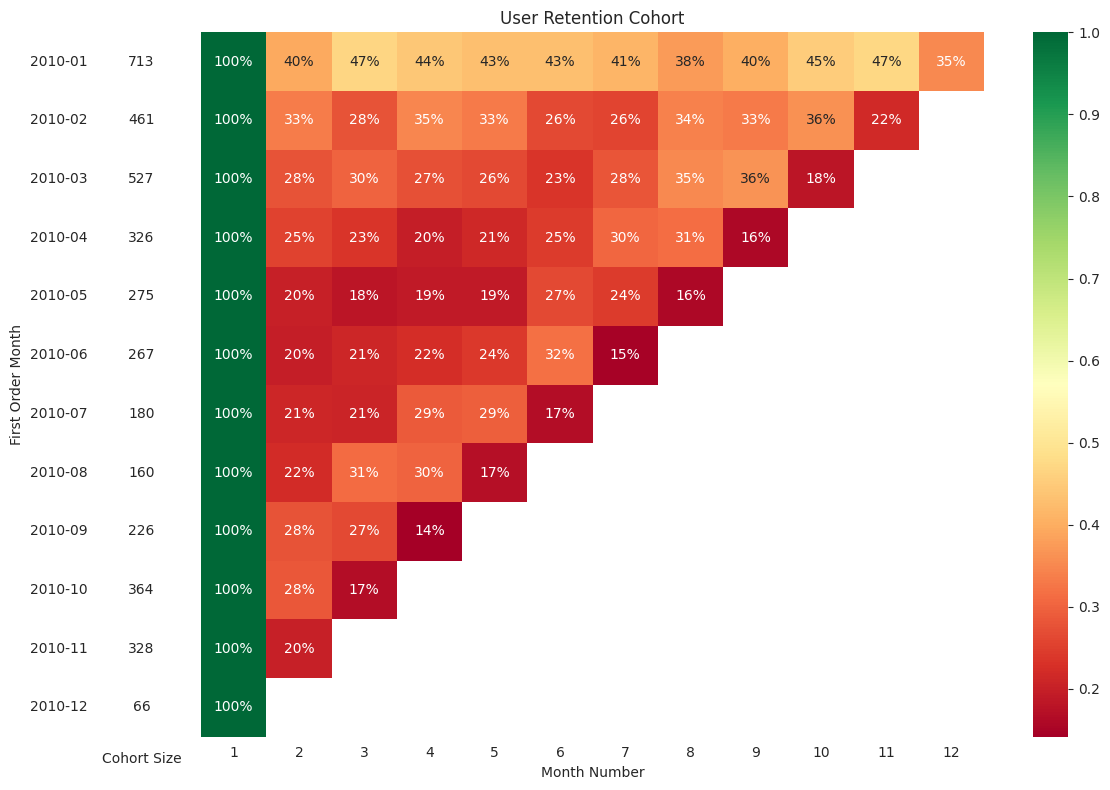

In [ ]:
# create a year_month column
df_clean['year_month'] = df_clean['order_date'].dt.to_period('M')
# Aggregate transaction data into a summary form of total transactions/orders for each user every month
df_user_monthly= df_clean.groupby(['customer_id','year_month'], as_index=False).agg(order_cnt=('order_id','nunique'))
# Create a column as a cohort of users, for example the cohort of the first month of transaction
df_user_monthly['cohort'] = df_user_monthly.groupby('customer_id')['year_month'].transform('min')
# Calculate the distance between the month of the transaction and the month of the first transaction
from operator import attrgetter
df_user_monthly['period_num'] = (df_user_monthly['year_month'] -
                                 df_user_monthly['cohort']).apply(attrgetter('n')) + 1
# Pivot table with index in the form of cohort, column in the form of month distance, and value is the number of unique users (unique count from user ID)
df_cohort_pivot = pd.pivot_table(df_user_monthly, index='cohort', columns='period_num', values='customer_id', aggfunc=pd.Series.nunique)
# Count the number of users in each cohort (users who made their first transaction in that month)
# and divide all the values ​​in the pivot table by that value as the retention rate
cohort_size = df_cohort_pivot.iloc[:, 0]
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)

# Display a pivot table that already contains the retention rate value in the heatmap
# pip install matplotlib
# pip install seaborn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
with sns.axes_style('white'):
  fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

  #user retention cohort
  sns.heatmap(df_retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
  ax[1].set_title('User Retention Cohort')
  ax[1].set(xlabel='Month Number', ylabel='')

  # cohort size
  df_cohort_size = pd.DataFrame(cohort_size)
  white_cmap = mcolors.ListedColormap(['white'])
  sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
  ax[0].tick_params(bottom=False)
  ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])

  fig.tight_layout()

# User Segmentation


Creat RFM segmentation

Recency = number of days since their last transaction

frequency = total transactions/orders

Monetary = total order value/order value

In [ ]:
# Aggregate transaction data into a summary form of total transactions (orders), total order value (order value),
# the last order date of each user
df_user = df_clean.groupby('customer_id', as_index=False).agg(order_cnt=('order_id','nunique'),
                                                              max_order_date=('order_date','max'),
                                                              total_order_value=('amount','sum'))
# Create a column for the number of days since the last order
today = df_clean['order_date'].max() #order terakhir dari user
df_user['day_since_last_order'] = (today - df_user['max_order_date']).dt.days
# Create a binning of the number of days since the last order consisting of 5 bins with the boundaries being
# min, P20, P40, P60, P80, max and label 1 to 5 from highest to lowest bin as recency score
df_user['recency_score'] = pd.cut(df_user['day_since_last_order'],
                                  bins=[df_user['day_since_last_order'].min(),
                                          np.percentile(df_user['day_since_last_order'], 20),
                                          np.percentile(df_user['day_since_last_order'], 40),
                                          np.percentile(df_user['day_since_last_order'], 60),
                                          np.percentile(df_user['day_since_last_order'], 80),
                                          df_user['day_since_last_order'].max()],
                                  labels=[5,4,3,2,1],
                                  include_lowest=True).astype(int)
# Create a binning of total transactions (orders) consisting of 5 bins with the boundaries being min,
# P20, P40, P60, P80, max and label 1 to 5 from lowest to highest bin as frequency score
df_user['frequency_score'] = pd.cut(df_user['order_cnt'],
                                  bins=[0,
                                          np.percentile(df_user['order_cnt'], 20),
                                          np.percentile(df_user['order_cnt'], 40),
                                          np.percentile(df_user['order_cnt'], 60),
                                          np.percentile(df_user['order_cnt'], 80),
                                          df_user['order_cnt'].max()],
                                  labels=[1,2,3,4,5],
                                  include_lowest=True).astype(int)
# Create binning from the total order value (order value) which consists of 5 bins with the boundaries being
# min, P20, P40, P60, P80, max and label 1 to 5 from lowest to highest bin as monetary score
df_user['monetary_score'] = pd.cut(df_user['total_order_value'],
                                  bins=[df_user['total_order_value'].min(),
                                          np.percentile(df_user['total_order_value'], 20),
                                          np.percentile(df_user['total_order_value'], 40),
                                          np.percentile(df_user['total_order_value'], 60),
                                          np.percentile(df_user['total_order_value'], 80),
                                          df_user['total_order_value'].max()],
                                  labels=[1,2,3,4,5],
                                  include_lowest=True).astype(int)
# Create a segment name column based on recency and frequency scores
df_user['segment'] = np.select(
    [(df_user['recency_score']==5) & (df_user['frequency_score']>=4),
     (df_user['recency_score'].between(3,4)) & (df_user['frequency_score']>=4),
     (df_user['recency_score']>=4) & (df_user['frequency_score'].between(2,3)),
     (df_user['recency_score']<=2) & (df_user['frequency_score']==5),
     (df_user['recency_score']==3) & (df_user['frequency_score']==3),
     (df_user['recency_score']==5) & (df_user['frequency_score']==1),
     (df_user['recency_score']==4) & (df_user['frequency_score']==1),
     (df_user['recency_score']<=2) & (df_user['frequency_score'].between(3,4)),
     (df_user['recency_score']==3) & (df_user['frequency_score']<=2),
     (df_user['recency_score']<=5) & (df_user['frequency_score']<=2)],
    ['01-Champion', '02-Loyal Customer', '03-Potential Loyalists', "04-Can't Lose Them", '05-Need Attention',
     '06-New Customers', '07-Promising', '08-At Risk', '09-About to Sleep', '10-Hibernating'])
# Show summary of RFM segmentation
summary = pd.pivot_table(df_user, index='segment',
                values=['customer_id', 'day_since_last_order', 'order_cnt', 'total_order_value'],
               aggfunc={'customer_id' : pd.Series.nunique,
                        'day_since_last_order' : [np.mean, np.median],
                        'order_cnt' : [np.mean, np.median],
                        'total_order_value' : [np.mean, np.median]})
summary['pct_unique'] = (summary['customer_id'] / summary['customer_id'].sum() * 100).round(1)
summary

customer_id day_since_last_order         order_cnt  \
                           nunique                 mean median       mean   
segment                                                                     
01-Champion                    551            10.571688    9.0  18.535390   
02-Loyal Customer              547            40.824497   37.0   8.780622   
03-Potential Loyalists         510            23.021569   24.0   2.833333   
04-Can't Lose Them              64           122.812500  113.0  11.343750   
05-Need Attention              185            58.254054   59.0   3.410811   
06-New Customers                50            14.180000   16.0   1.000000   
07-Promising                   134            32.044776   32.0   1.000000   
08-At Risk                     424           140.945755  120.0   4.143868   
09-About to Sleep              371            58.053908   58.0   1.412399   
10-Hibernating                1057           196.822138  198.0   1.313150   

                              total_order_value           pct_unique  
                       median              mean    median             
segment                                                               
01-Champion              11.0       6936.138140  2777.140       14.2  
02-Loyal Customer         7.0       2634.955581  1962.090       14.1  
03-Potential Loyalists    3.0        770.180549   625.710       13.1  
04-Can't Lose Them        9.5       2876.881875  2268.405        1.6  
05-Need Attention         3.0        980.802924   824.190        4.8  
06-New Customers          1.0        244.689000   193.675        1.3  
07-Promising              1.0        289.415075   241.950        3.4  
08-At Risk                4.0       1158.309436   898.205       10.9  
09-About to Sleep         1.0        446.181968   335.540        9.5  
10-Hibernating            1.0        342.345679   256.700       27.2

The pronunciation is as follows:
In the Champion segment, there are 551 users with:

- an average of days since the last order of 10 days and a median of 9 days.
an average of number of orders / how many times ordered 18 times and a median of 11 times.
an average of total orders of 6936 usd, with a median of 2777 usd.

Analyzing RFM segmentation
- The **most** users are in:
1. Hibernating (1057 / 27.3%)
2. Champions (551 / 14.2%)
3. Loyal Customers (547 / 14.1%)
- A special program that focuses on **transaction urgency** for **Loyal Customers** (546 / 14%) can be created to make them **transaction again in the near future** so they can move up to the champion segment
- A special program that focuses on **number of transactions** for **Potential Loyalist** (523 / 13.4%) can be created to make them **transaction more often** so they can move up to the Champion segment
- A special program for **Hibernating** (1060 / 27.3%) can be created to make them **return to transactions even though not very often** so they can move up to the New Customer or even Potential Loyalist segment